# Loading data

In [22]:
import h5py
import numpy as np


H, W = 480, 640

drone_data = h5py.File('/home/aric/adasi/data/2025-07-17-12-49-53_full_testing.h5', 'r')
shapes_data = h5py.File('/home/aric/adasi/data/shapes.h5', 'r')

drone_events = drone_data['events_data'][:]
drone_events = shapes_data['events_data'][:]

print(drone_events.dtype)
print("We have {} events".format(len(drone_events)))


[('x', '<i2'), ('y', '<i2'), ('p', '?'), ('t', '<f8')]
We have 28855004 events


In [17]:
#first and last 5 events
print("First 5 events:")
print(drone_events[:5])
print("Last 5 events:")
print(drone_events[-5:])

    

First 5 events:
[( 4, 247, False, 0.) ( 5, 302, False, 0.) ( 6,  59, False, 0.)
 ( 9, 436,  True, 0.) (16, 263, False, 0.)]
Last 5 events:
[(631,  25, False, 9.99975014) (632, 178, False, 9.99975014)
 (634, 181, False, 9.99975014) (635,  40, False, 9.99975014)
 (638, 185, False, 9.99975014)]


## Event processing preliminary

Processing neuromorphic event-based datasets is much different than what you're probably used to. Event data is 

1. Temporally asynchronous (unlike typical video data) and dense
2. Spatially sparse (unlike typical images)

You can see from above that we have a list of more than a million events over the span of only ~300 seconds. How do we about understanding this data? Let's first try to understand the temporal aspect of this data

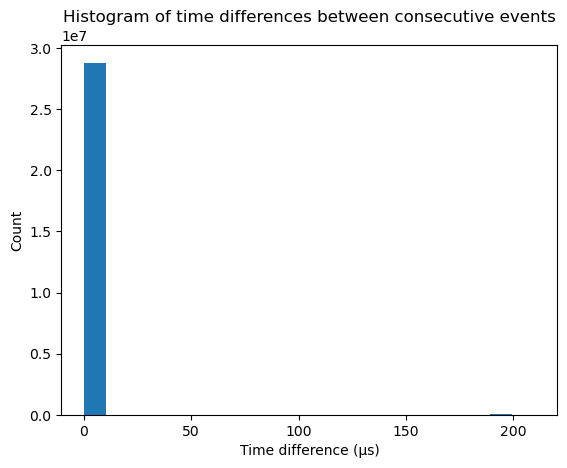

In [18]:
import matplotlib.pyplot as plt

#differences in time between consecutive events
diffs = np.diff(drone_events['t'])

plt.hist(diffs*1e6, bins=20)
plt.xlabel('Time difference (µs)')
plt.ylabel('Count')
plt.title('Histogram of time differences between consecutive events')
plt.show()

You can see that most events are less than 20 microseconds away from the next event. This indeed confirms that event data is temporally dense. Let's try to understand which periods of time have the most events. Intution tells us that these regions should correspond to motion in the scene.

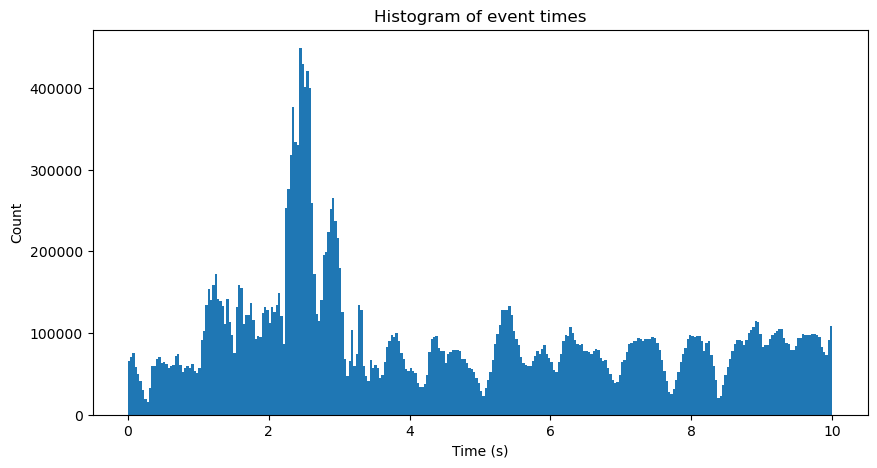

In [23]:
plt.figure(figsize=(10, 5))
plt.hist(drone_events['t'], bins=300)
plt.xlabel('Time (s)')
plt.ylabel('Count')
plt.title('Histogram of event times')
plt.show()

We can see that there was a lot of movement in the first few seconds, from the bigger number of events. Let's look at one time window.

In [30]:
def get_events_between(events, t0, t1):
    idx = np.where((events['t'] >= t0) & (events['t'] <= t1))[0]
    out = events[idx]
    return out

t0 = 2.9
t1 = t0 + 0.03 #a 30 ms window

sample = get_events_between(drone_events, t0, t1)

print("Number of events between {} and {} seconds: {}".format(t0, t1, len(sample)))

Number of events between 2.9 and 2.9299999999999997 seconds: 239788


One way to visualize these events to simply put a red pixel where a negative event has happened and a blue where a positive event has happened. Let's initialize an empty image and do that.

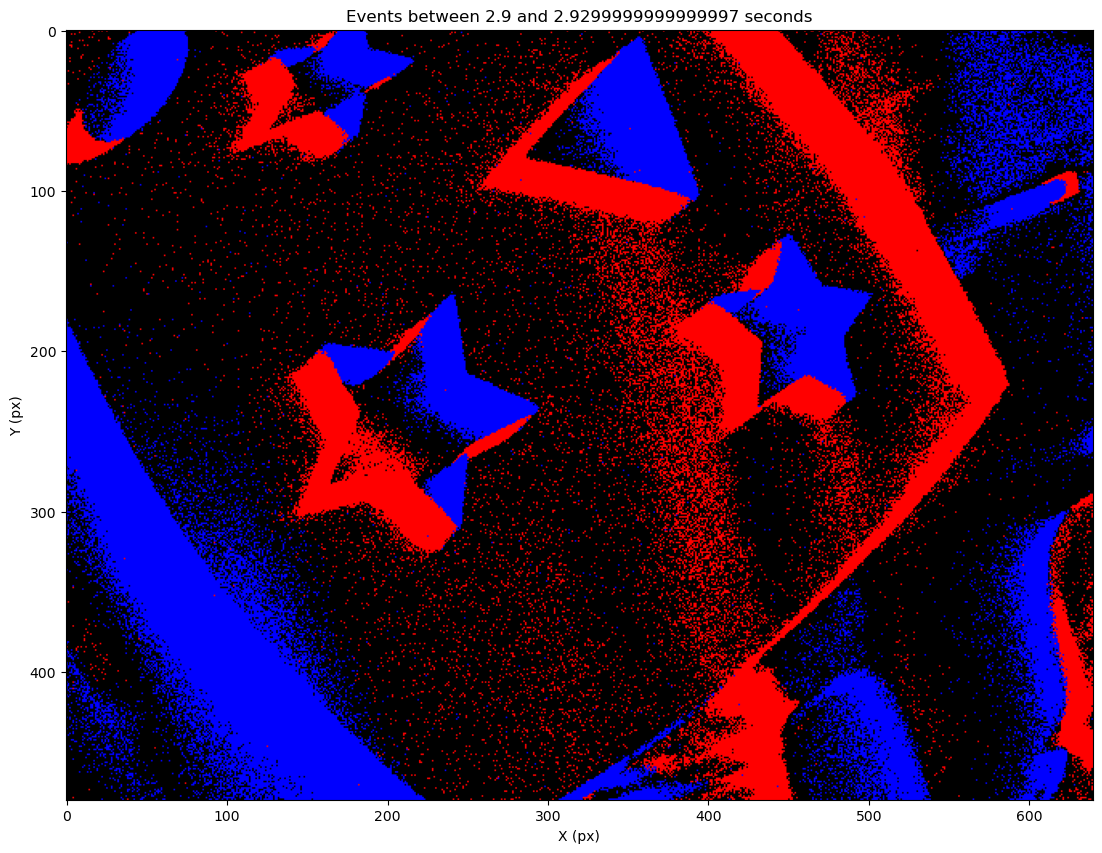

In [31]:
img = np.zeros((H, W, 3), dtype=np.uint8) # W x H x C
# Initialize an empty image with 3 channels (RGB)
# Note: The dimensions (240, 346) should match the resolution of your event camera

for event in sample:
    x, y, p = event['x'], event['y'], event['p']
    if p:  # Positive event
        img[y, x, 0] = 255
        img[y, x, 1] = 0
        img[y, x, 2] = 0
    else:  # Negative event
        img[y, x, 0] = 0
        img[y, x, 1] = 0
        img[y, x, 2] = 255

plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.xlabel('X (px)')
plt.ylabel('Y (px)')
plt.title('Events between {} and {} seconds'.format(t0, t1))
plt.show()


Notice how in this representation we are losing temporal information. We are only accounting from the most recent event in each pixel. We are also losing the frequency information for each of the pixels. You still get a very rough idea what the general shape looks like. However we can do better.

Based on the representations you learnt in the lecture, your goal now is now to try and implement them on your own. To give you a hint, the final dimensions of each frame representation is given. First things first, try to plot the 3D scatter plot. 

## Reproduce the 3D plot

In [32]:
plt.figure(figsize=(10, 10))

# your code here

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

## Reproduce the histogram without polarity (H x W x 1)

In [ ]:
#code to produce event frame histogram

## Reproduce the histogram with polarity (H x W x 2)
plot each polarity channel on its own

In [ ]:
#code to produce the event image with polarity

## Reproduce the voxel grid with 4 bins (H x W x 4)

In [ ]:
#code to produce voxel grid

## Reproduce the average timestamps H x W x 1

In [29]:
#code to produce average timestamps